# Problem 2
## (Problem 10, Chapter 4, page 171)

This question should be answered using the <b>weekly</b> dataset, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter's lab, except that it contains 1,089 weekly returns from 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

InteractiveShell.ast_node_interactivity = "all"
%matplotlib notebook

def plotConfusionMatrix(conf_matrix):
    fig = plt.figure(figsize = (5,3))
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    _ = plt.imshow(conf_matrix_norm, interpolation='nearest', cmap=plt.cm.Blues)
    _ = plt.title('Confusion Matrix')
    _ = plt.colorbar()
    _ = plt.xticks([0,1], ['Down', 'Up'], rotation=45)
    _ = plt.yticks([0,1], ['Down', 'Up'])
    _ = plt.ylabel('True label')
    _ = plt.xlabel('Predicted label')

## Part A
Produce some numerical and graphical summaries of the <b>Weekly</b> data. Do there appear to be any patterns?

In [46]:
filepath = '../../datasets/ISLR/data/csv/'
filename = 'Weekly.csv'
weekly = pd.read_csv(filepath + filename)
weekly.drop(['Unnamed: 0'], axis=1, inplace=True) #error in converting to csv
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


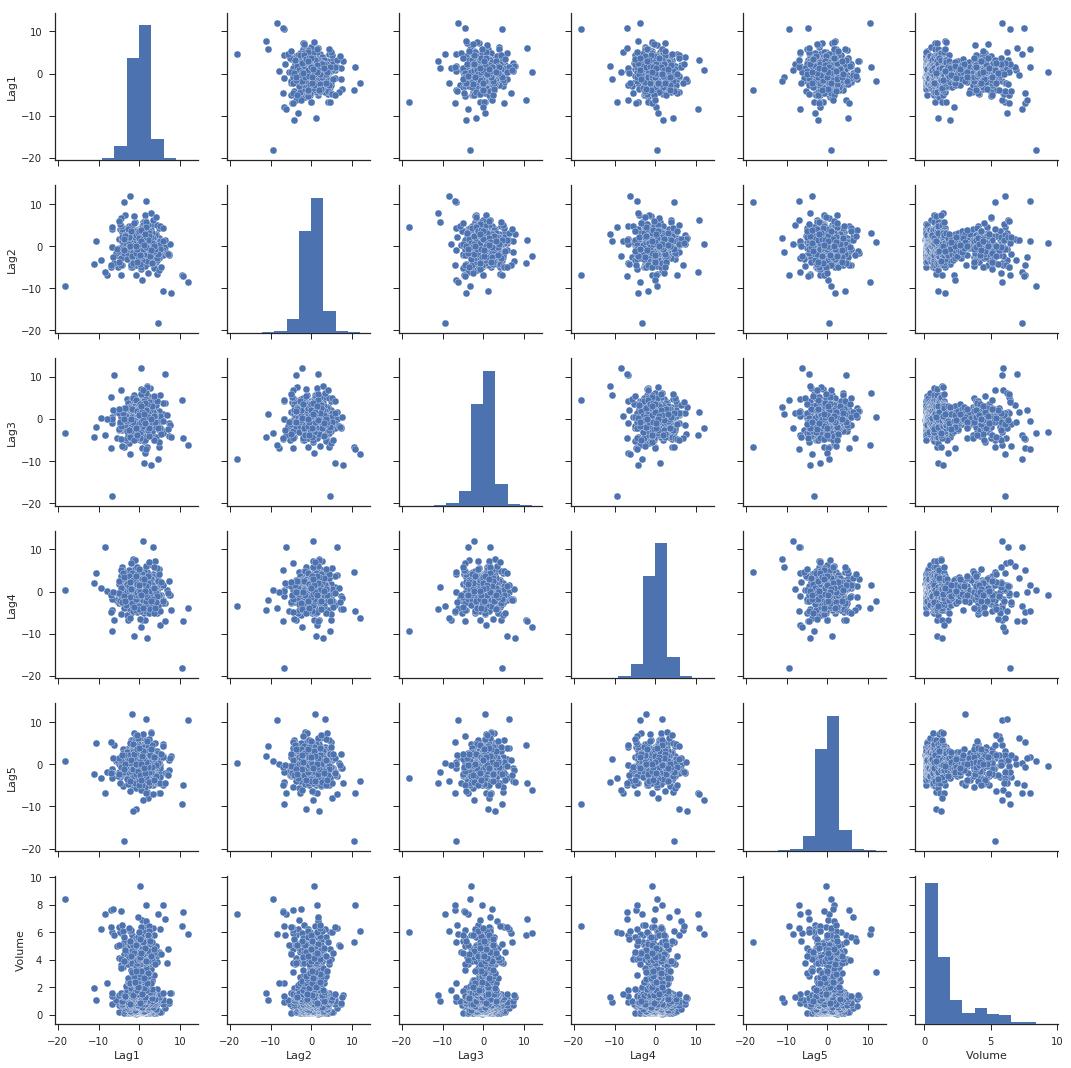

In [3]:
# Use Seaborn to plot scatter matrix of lags, volume, and today

#_ = scatter_matrix(weekly.iloc[:,1:7])
sns.set(style="ticks")
_ = sns.pairplot(weekly.iloc[:,1:7])
#plt.title('Scatter of Feature Correlation', fontsize='15')
#plt.title('(Year and Direction not shown)')
plt.show()

## Part B
Use the full data set to perform a logistic regression with <b>Direction</b> as the response and the five lag variables plus <b>Volume</b> as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [4]:
# Returns zeros
#weekly.isnull().sum()

In [5]:
# First we need to convert the directions into zeros and ones.
# We do so with sklearn's label binarizer.
lb = LabelBinarizer()
y = lb.fit_transform(weekly.Direction)

# Then we create our X from the columns as required
X = np.array(weekly[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']])

# Shuffle and split the training set
#rand = int.from_bytes(os.urandom(8), byteorder="big") / ((1 << 64) - 1)
rand = np.random.randint(0,100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rand)
y_train = np.reshape(y_train, (y_train.shape[0],))

# Log Regression
clf = LogisticRegression()
_ = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(clf.score(X_test, y_test))

##############################
########## Print summary???

0.5970695970695971


## Part C
Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[ 15 100]
 [ 10 148]]


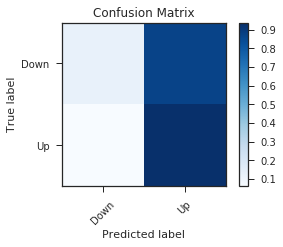

In [6]:
print("We have:\n")
print("True positives   |  False positives")
print("-----------------------------------")
print("False negatives  |  True negatives\n")
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

Our classifier generates lots of false positives, and few true positives. The false negative rate is also very low, while the true negative rate is high. This means it is very good at predicting when it is going to be DOWN, but not when it is going to be UP.

## Part D
Now fit the logistic regression model using a training data period from 1990 to 2008, with <b>Lag2</b> as the only predictor. Compute the confusion matrix and the overall fraction of correct prediction for the held out data (that is, the data from 2009 to 2010).

In [7]:
# We create our data set from the columns as required
X_train_2 = weekly[weekly['Year'] < 2009]
X_train_2 = X_train_2['Lag2']

y_train_2 = weekly[weekly['Year'] < 2009]
y_train_2 = y_train_2['Direction']

X_test_2 = weekly[weekly['Year'] > 2008]
X_test_2 = X_test_2['Lag2']

y_test_2 = weekly[weekly['Year'] > 2008]
y_test_2 = y_test_2['Direction']

# Convert labels again
lb_2 = LabelBinarizer()
y_train_2 = lb_2.fit_transform(y_train_2)
y_test_2 = lb_2.fit_transform(y_test_2)
y_train = np.reshape(y_train, (y_train.shape[0]))
y_test = np.reshape(y_test, (y_test.shape[0]))

# Reshape
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], 1))
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], 1))

# Log Regression
clf_2 = LogisticRegression()
_ = clf_2.fit(X_train_2, y_train_2)
pred_2 = clf_2.predict(X_test_2)
print(clf_2.score(X_test_2, y_test_2))

0.625


/mnt/c/programming/ee379k/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
/mnt/c/programming/ee379k/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[ 9 34]
 [ 5 56]]


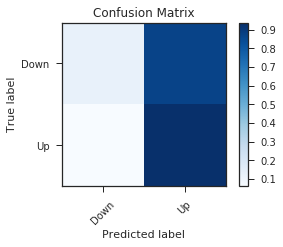

In [8]:
print("We have:\n")
print("True positives   |  False positives")
print("-----------------------------------")
print("False negatives  |  True negatives\n")
conf_matrix_2 = confusion_matrix(y_test_2, pred_2)
print(conf_matrix_2)
plotConfusionMatrix(conf_matrix)

The desired computation is: (9 + 56)/(9 + 56 + 5 + 34)
or, Number Correct/Total Number of Predictions

In [9]:
num_correct = (9 + 56)/(9 + 56 + 5 + 34)
print(num_correct)

0.625


This answer agrees with the computed score

## Part E
Repeat (D) using LDA.

In [10]:
# Make LDA, fit it, and get transformed X
lda = LinearDiscriminantAnalysis()
_ = lda.fit(X_train_2, y_train_2)
pred_2 = lda.predict(X_test_2)
print(lda.score(X_test_2, y_test_2))

0.625


/mnt/c/programming/ee379k/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[ 9 34]
 [ 5 56]]


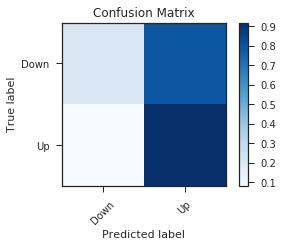

In [11]:
print("We have:\n")
print("True positives   |  False positives")
print("-----------------------------------")
print("False negatives  |  True negatives\n")
conf_matrix = confusion_matrix(y_test_2, pred_2)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

The desired computation is: (9 + 56)/(9 + 56 + 5 + 34)
or, Number Correct/Total Number of Predictions

In [12]:
num_correct = (9 + 56)/(9 + 56 + 5 + 34)
print(num_correct)

0.625


This answer agrees with the computed score

## Part F
Repeat (D) using QDA.

In [13]:
# Make QA, fit it, and get transformed X
qda = QuadraticDiscriminantAnalysis()
_ = qda.fit(X_train, y_train)
pred_2 = qda.predict(X_test_2)
print(qda.score(X_test_2, y_test_2))

0.5865384615384616


We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[ 0 43]
 [ 0 61]]


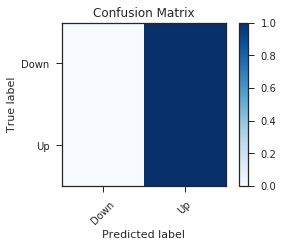

In [14]:
print("We have:\n")
print("True positives   |  False positives")
print("-----------------------------------")
print("False negatives  |  True negatives\n")
conf_matrix = confusion_matrix(y_test_2, pred_2)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

The desired computation is: (61)/(61 + 43)
or, Number Correct/Total Number of Predictions

In [18]:
num_correct = (61)/(61 + 43)
print(num_correct)

0.5865384615384616


This answer agrees with the computed score

## Part G
Repeat (D) using KNN with K = 1.

In [16]:
# Make KNN, fit it, and get transformed X
clf_3 = KNeighborsClassifier()
_ = clf_3.fit(X_train_2, y_train_2)
pred_2 = lda.predict(X_test_2)
print(lda.score(X_test_2, y_test_2))

0.625


/mnt/c/programming/ee379k/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


We have:

True positives   |  False positives
-----------------------------------
False negatives  |  True negatives

[[ 9 34]
 [ 5 56]]


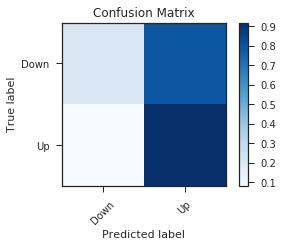

In [17]:
print("We have:\n")
print("True positives   |  False positives")
print("-----------------------------------")
print("False negatives  |  True negatives\n")
conf_matrix = confusion_matrix(y_test_2, pred_2)
print(conf_matrix)
plotConfusionMatrix(conf_matrix)

## Part H
Which of these methods appears to provide the best results on this data?

## Part I
 Experiment with different combinations of predictors, including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for K in the KNN classifier.

In [20]:
# Lets make some new data
X_train = weekly[weekly['Year'] < 2009]
X_train = X_train[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]

y_train = weekly[weekly['Year'] < 2009]
y_train = y_train['Direction']

X_test = weekly[weekly['Year'] > 2008]
X_test = X_test[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']]

y_test = weekly[weekly['Year'] > 2008]
y_test = y_test['Direction']

Trying a few different LDAs...

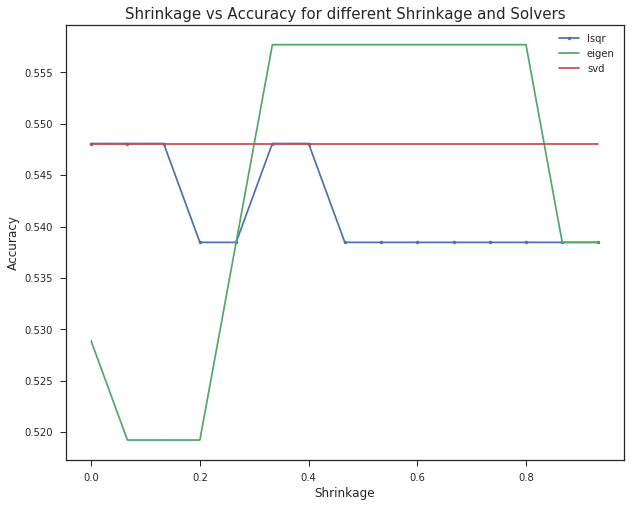

In [42]:
solvers = ['lsqr', 'eigen']
shrinkages = np.linspace(0, 1, 15, endpoint=False)
scores = np.empty((3,15))

for i in range(len(solvers)):
    score = []
    for shrinkage in shrinkages:
        clf = LinearDiscriminantAnalysis(solver=solvers[i], shrinkage=shrinkage)
        _ = clf.fit(X_train, y_train)
        score.append(clf.score(X_test, y_test))
    scores[i, :] = score

clf = LinearDiscriminantAnalysis()
_ = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test) * np.ones((1,15))
scores[2, :] = score

_ = plt.figure(figsize = (10,8))
_ = plt.plot(shrinkages, scores[0,:], marker='.', label = solvers[0])
_ = plt.plot(shrinkages, scores[1,:], marker=',', label = solvers[1])
_ = plt.plot(shrinkages, scores[2,:], label = 'svd')
_ = plt.xlabel("Shrinkage", fontsize=12)
_ = plt.ylabel("Accuracy", fontsize=12)
_ = plt.title("Shrinkage vs Accuracy for different Shrinkage and Solvers", fontsize=15)
_ = plt.legend()

These are all pretty bad, and are worse than when we just used Lag 2. Going to check out the correlation between columns and Direction, then move on to KNN for now.

In [59]:
lb = LabelBinarizer()
y = lb.fit_transform(weekly.Direction)
weekly_copy = weekly.copy()
y = pd.DataFrame(y, columns=['DirectionBinary'])
weekly_copy = pd.concat([weekly_copy, y], axis = 1)
corr_matrix = weekly_copy.corr()
print(corr_matrix['DirectionBinary'].sort_values(ascending=False))
#print(corr_matrix)

DirectionBinary    1.000000
Today              0.720025
Lag2               0.072696
Volume            -0.017995
Lag5              -0.018168
Lag4              -0.020549
Year              -0.022200
Lag3              -0.022913
Lag1              -0.050004
Name: DirectionBinary, dtype: float64


Based on our new information of the correlation, lets choose to run an eigen LDA with shrinkage = 0.6 (based on previous results), using the columns Lag1, Lag2, and Today.

In [61]:
# Lets make some new data
X_train = weekly_copy[weekly_copy['Year'] < 2009]
X_train = X_train[['Lag1', 'Lag2', 'Today']]

y_train = weekly_copy[weekly_copy['Year'] < 2009]
y_train = y_train['DirectionBinary']

X_test = weekly_copy[weekly_copy['Year'] > 2008]
X_test = X_test[['Lag1', 'Lag2', 'Today']]

y_test = weekly_copy[weekly_copy['Year'] > 2008]
y_test = y_test['DirectionBinary']

In [62]:
clf = LinearDiscriminantAnalysis()
_ = clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

In [63]:
print(score)

0.9615384615384616
